# LIBS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# UTILS

## FUCTIONS

In [119]:
def get_values_statistics(df, column: str)-> tuple:
    max_value = df[column].max()
    min_value = df[column].min()
    mean_value = df[column].mean()
    return (max_value, min_value, mean_value)

def boxplot(df, column: str, title: str = '')-> None:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[column], vert=False)
    plt.title(title)
    plt.show()

def violinplot(df, column: str, title: str = '')-> None:
    plt.figure(figsize=(6, 3))
    plt.violinplot(df[column], vert=False)
    plt.xlabel(column)
    plt.title(title)
    plt.show()

def scatter_plot(df, column_x: str, column_y: str, label_x=None, label_y=None, title= 'Gráfico de Dispersão'):
    if label_x is None:
        label_x = column_x

    if label_y is None:
        label_y = column_y

    plt.figure(figsize=(10, 4))
    plt.scatter(df[column_x], df[column_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.grid(True)
    plt.show()
    
def bar_plot(df, column_x: str, column_y: str, label_x: str=None, label_y: str=None, title: str='Gráfico de Barras')->None:
    if label_x is None:
        label_x = column_x

    if label_y is None:
        label_y = column_y

    plt.figure(figsize=(10, 6))
    plt.bar(df[column_x], df[column_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.xticks(rotation=90)  
    plt.grid(True)
    plt.show()

def bar_plot_custom_intervals(data, column: str, intervals=None, interval_size=50, xlabel='Intervalos', ylabel='Contagem', title='Contagem de Valores por Intervalo'):
    
    data = data.dropna(subset=[column])
    data[column] = data[column].astype(int)

    if intervals:
        custom_intervals = pd.IntervalIndex.from_tuples(intervals)
        bins = custom_intervals
    else:
        bins = range(0, data[column].max() + interval_size, interval_size)

    intervals = pd.cut(data[column], bins=bins)
    counts = intervals.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', width=0.8)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(False)
    
    for i, val in enumerate(counts):
        plt.text(i, val + 0.2, str(val), ha='center', va='bottom')
    
    plt.show()
    

# ANALYSIS

## RESULTS ANALYSIS

#### TREATS  

In [16]:
resutls = pd.read_csv('../dataset/dados_tratados.csv', sep=';')
resutls.head()

,Repositorio,Nome,Estrelas,Anos,nº Releases,média CBO,desvio padão CBO,média LCOM,desvio padão LCOM,DIT máximo
0,Snailclimb/JavaGuide,JavaGuide,141978,5.88,0,NaN,NaN,NaN,NaN,NaN
1,GrowingGit/GitHub-Chinese-Top-Charts,GitHub-Chinese-Top-Charts,86585,4.55,0,0.000000,0.000000,0.000000,0.000000,1.0
2,iluwatar/java-design-patterns,java-design-patterns,86114,9.62,0,NaN,NaN,NaN,NaN,NaN
3,MisterBooo/LeetCodeAnimation,LeetCodeAnimation,74852,5.30,0,1.000000,0.000000,1.000000,1.000000,1.0
4,macrozheng/mall,mall,74810,5.97,3,3.931579,4.950338,3.931579,3.931579,4.0


In [27]:
print(f'Número de linhas: {resutls.shape[0]} - Número de colunas: {resutls.shape[1]} \n')
print('Total de valores vazios por colunas ')
resutls.isna().sum()

Número de linhas: 1000 - Número de colunas: 10 

Total de valores vazios por colunas 


Repositorio            0
Nome                   0
Estrelas               0
Anos                   0
nº Releases            0
média CBO            120
desvio padão CBO     120
média LCOM           120
desvio padão LCOM    120
DIT máximo           120
dtype: int64

In [15]:
resutls.describe()

,Estrelas,Anos,nº Releases,média CBO,desvio padão CBO,média LCOM,desvio padão LCOM,DIT máximo
count,1000.000000,1000.000000,1000.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,7747.740000,8.286260,26.339000,5.193570,5.928106,5.193570,5.193570,25.604545
std,9887.228341,2.762995,48.285832,1.681828,2.453616,1.681828,1.681828,170.206889
min,2446.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3429.000000,6.700000,0.000000,4.257089,4.606606,4.257089,4.257089,3.000000
50%,4604.000000,8.250000,9.000000,5.156966,5.799034,5.156966,5.156966,5.000000
75%,8129.250000,10.250000,29.000000,6.126371,7.060170,6.126371,6.126371,10.000000
max,141978.000000,15.200000,344.000000,13.892857,24.956161,13.892857,13.892857,3734.000000


In [29]:
# Vou querer tratar erros a parte dos que não retornaram nada?
# Serão descardos?

data = resutls.dropna()
print(f'Número de linhas descartadas: {resutls.shape[0] - data.shape[0]}  \n')


Número de linhas descartadas: 120  



### GRAFHS

#### REALEASES ANALYSIS

In [122]:
releases_column = 'nº Releases'

max_cbo, min_cbo, mean_cbo = get_values_statistics(df=data, column=releases_column)
print(f'Para a coluna: {releases_column}')
print('MAX: {} - MIN: {} - mean: {:.2f}'.format(max_cbo, min_cbo, mean_cbo))

Para a coluna: nº Releases
MAX: 344 - MIN: 0 - mean: 25.45


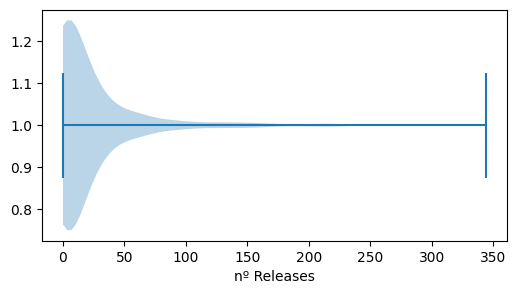

In [124]:
violinplot(df=data, column=releases_column)

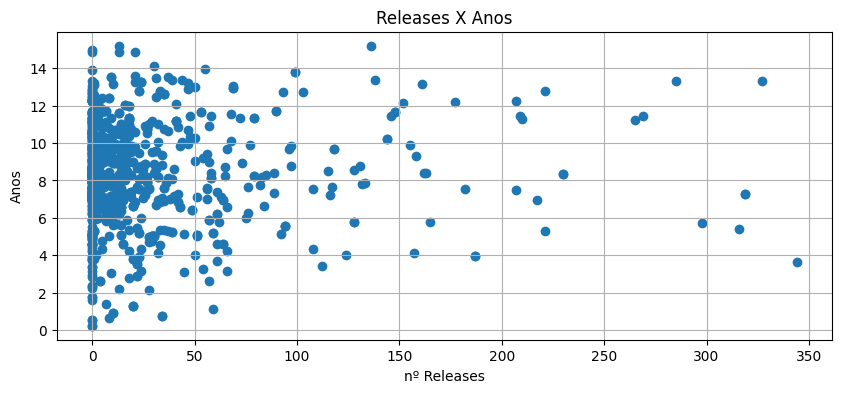

In [125]:
scatter_plot(df=data, column_x=releases_column, column_y='Anos', title='Releases X Anos')

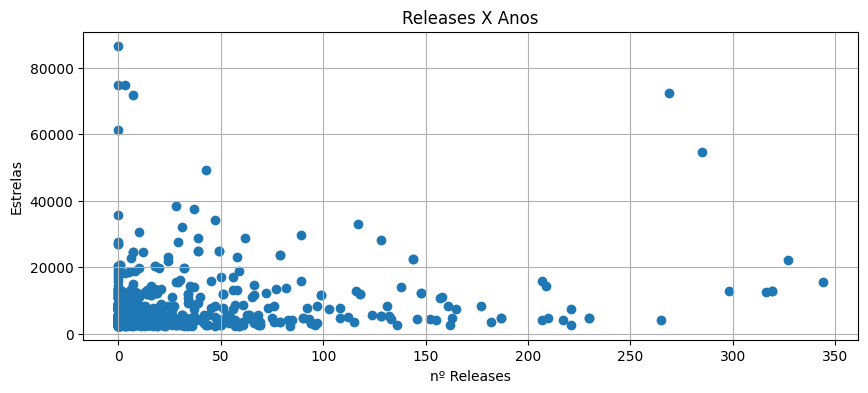

In [126]:
scatter_plot(df=data, column_x=releases_column, column_y='Estrelas', title='Releases X Anos')

#### CBO ANALYSIS

In [100]:
cbo_mean_column = 'média CBO'
cbo_standard_column = 'desvio padão CBO'

max_cbo, min_cbo, mean_cbo = get_values_statistics(df=data, column=cbo_mean_column)
print(f'Para a coluna: {cbo_mean_column}')
print('MAX: {:.2f} - MIN: {} - mean: {:.2f}'.format(max_cbo, min_cbo, mean_cbo))

max_std,min_std,mean_std = get_values_statistics(df=data, column=cbo_standard_column)
print(f'\nPara a coluna: {cbo_standard_column}')
print('MAX: {:.2f} - MIN: {} - mean: {:.2f}'.format(max_std,min_std,mean_std))



Para a coluna: média CBO
MAX: 13.89 - MIN: 0.0 - mean: 5.19

Para a coluna: desvio padão CBO
MAX: 24.96 - MIN: 0.0 - mean: 5.93


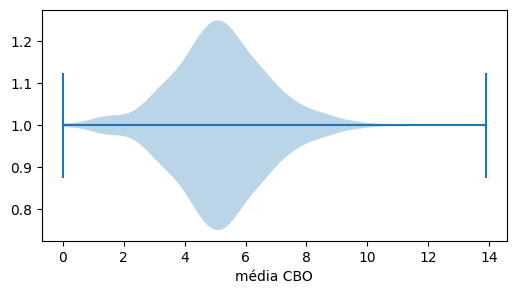

In [86]:
violinplot(df=data, column=cbo_mean_column)

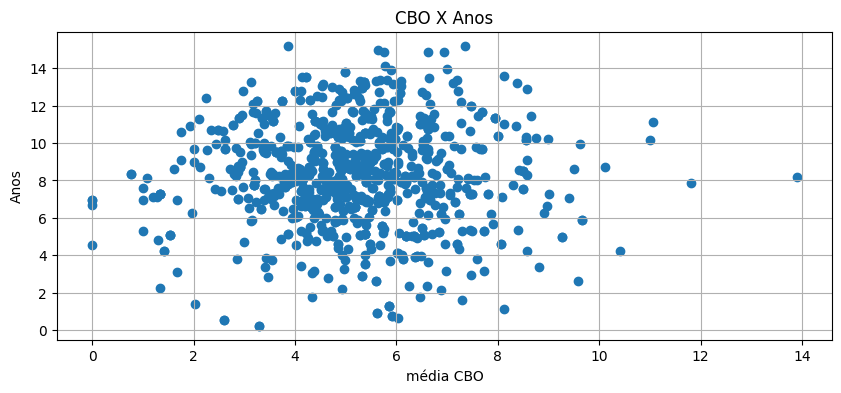

In [88]:
scatter_plot(df=data, column_x=cbo_mean_column, column_y='Anos', title='CBO X Anos')

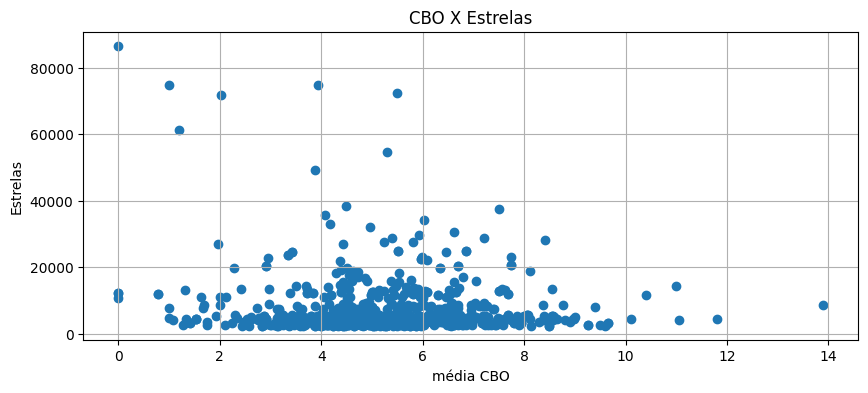

In [90]:
scatter_plot(df=data, column_x=cbo_mean_column, column_y='Estrelas', title='CBO X Estrelas')

#### LCOM ANALYSIS

In [101]:
lcom_mean_column = 'média LCOM'
lcom_standard_column = 'desvio padão LCOM'

max_cbo, min_cbo, mean_cbo = get_values_statistics(df=data, column=lcom_mean_column)
print(f'Para a coluna: {lcom_mean_column}')
print('MAX: {:.2f} - MIN: {} - mean: {:.2f}'.format(max_cbo, min_cbo, mean_cbo))

max_std,min_std,mean_std = get_values_statistics(df=data, column=lcom_standard_column)
print(f'\nPara a coluna: {lcom_standard_column}')
print('MAX: {:.2f} - MIN: {} - mean: {:.2f}'.format(max_std,min_std,mean_std))

Para a coluna: média LCOM
MAX: 13.89 - MIN: 0.0 - mean: 5.19

Para a coluna: desvio padão LCOM
MAX: 13.89 - MIN: 0.0 - mean: 5.19


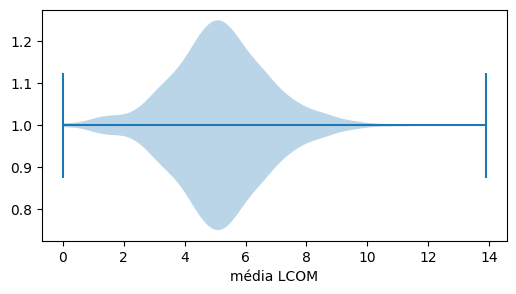

In [102]:
violinplot(df=data, column=lcom_mean_column)

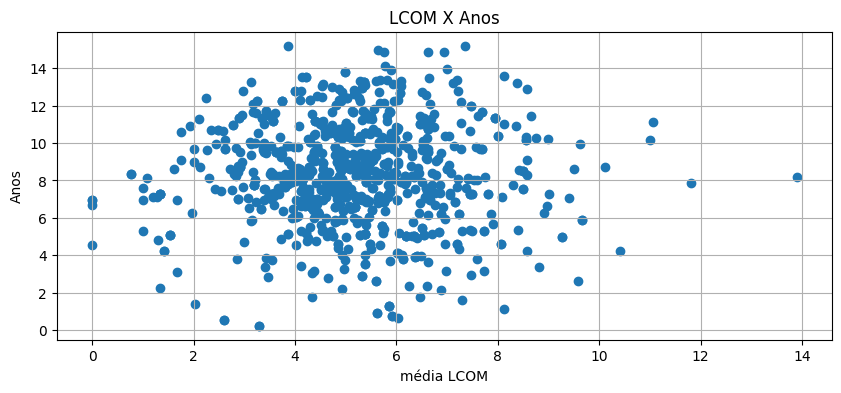

In [103]:
scatter_plot(df=data, column_x=lcom_mean_column, column_y='Anos', title='LCOM X Anos')

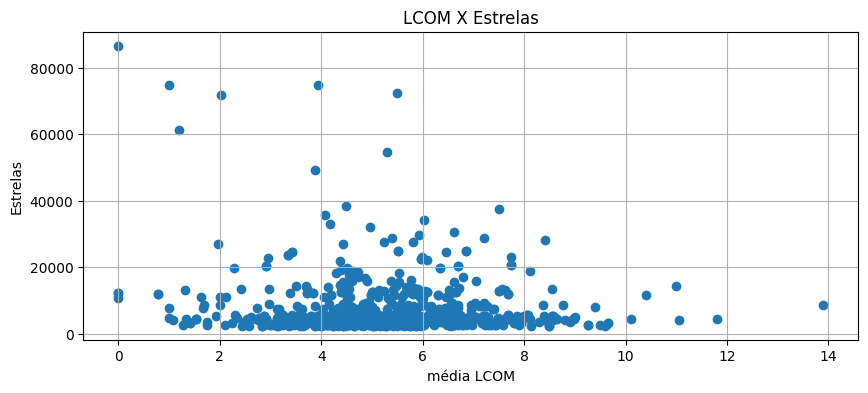

In [104]:
scatter_plot(df=data, column_x=lcom_mean_column, column_y='Estrelas', title='LCOM X Estrelas')

#### DIT ANALYSIS

In [110]:
dit_column = 'DIT máximo'

max_dit, min_dit, mean_dit = get_values_statistics(df=data, column=dit_column)
print(f'Para a coluna: {dit_column}')
print('MAX: {} - MIN: {} - mean: {:.2f}'.format(max_dit, min_dit, mean_dit))

Para a coluna: DIT máximo
MAX: 3734.0 - MIN: 1.0 - mean: 25.60


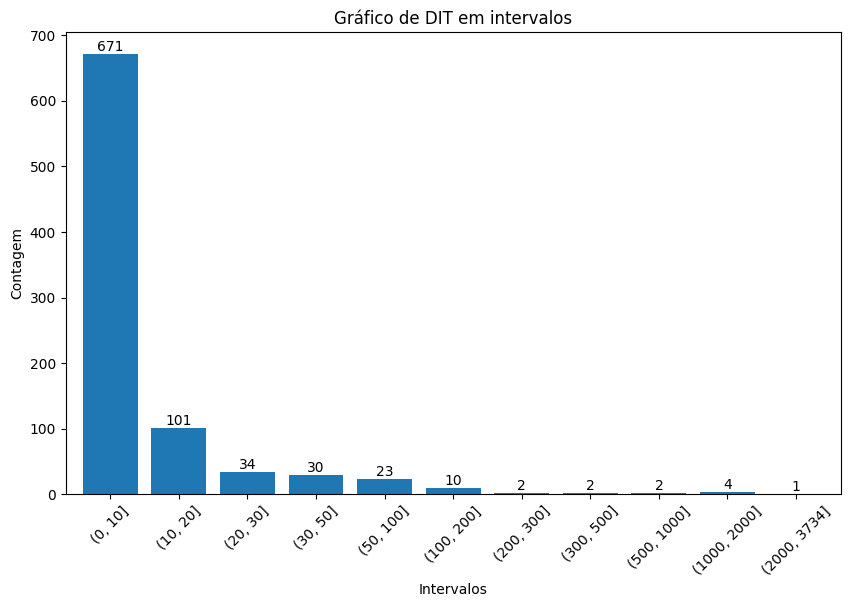

In [120]:

intervals = [(0, 10), (10, 20), (20, 30), (30, 50), (50, 100), (100,200), (200, 300),(300,500), (500,1000), (1000,2000), (2000, int(max_dit))]
bar_plot_custom_intervals(data=data, column='DIT máximo', intervals=intervals, title='Gráfico de DIT em intervalos')

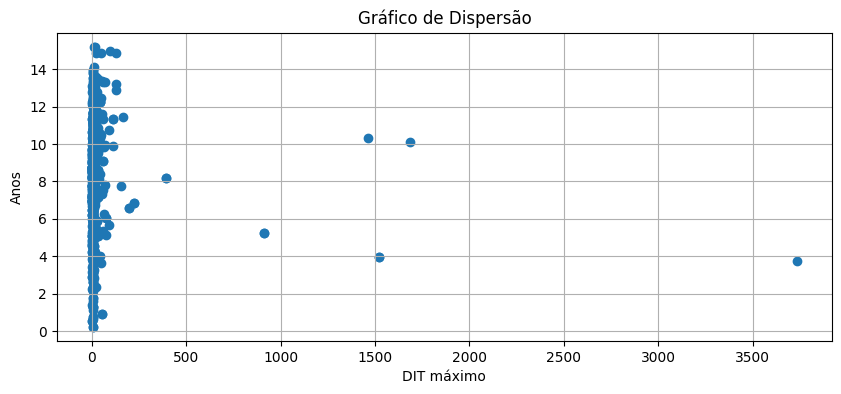

In [116]:
scatter_plot(df=data, column_x=dit_column, column_y='Anos')

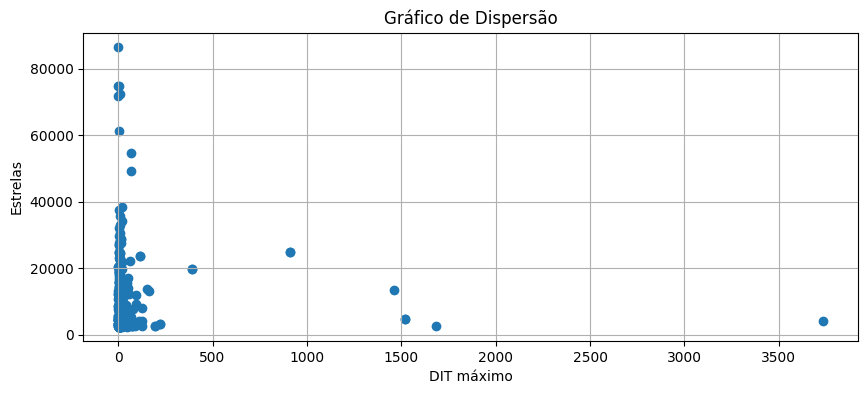

In [114]:
scatter_plot(df=data, column_x=dit_column, column_y='Estrelas')

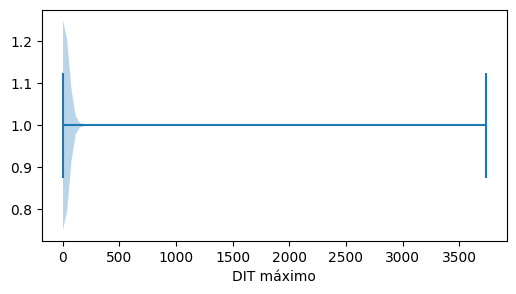

In [121]:
violinplot(df=data, column=dit_column)

## ERROR ANALYSIS

In [130]:
errors = pd.read_csv('../dataset/repo_with_erros.csv', sep=';')

print(f'Total de erros: {errors.shape[0]} \n')
errors.head()

Total de erros: 108 



,nameWithOwner,error
0,iluwatar_java-design-patterns,No columns to parse from file
1,ReactiveX_RxJava,No columns to parse from file
2,NationalSecurityAgency_ghidra,No columns to parse from file
3,apache_dubbo,No columns to parse from file
4,PhilJay_MPAndroidChart,No columns to parse from file


In [134]:
type_errors = errors['error'].unique()
print('Erros encontrados ao rodar o CK nos repositórios clonados \n')
for error in type_errors:
    count = errors[errors['error'] == error].shape[0]  
    print(f'error: {error} || quant: {count}')

    

Erros encontrados ao rodar o CK nos repositórios clonados 

error: No columns to parse from file || quant: 100
error: 'utf-8' codec can't decode byte 0xe9 in position 747: invalid continuation byte || quant: 1
error: 'utf-8' codec can't decode byte 0xc4 in position 80672: invalid continuation byte || quant: 2
error: 'utf-8' codec can't decode byte 0xe9 in position 6915: invalid continuation byte || quant: 1
error: 'utf-8' codec can't decode byte 0xa0 in position 2411: invalid start byte || quant: 1
error: 'utf-8' codec can't decode byte 0xe6 in position 15043: invalid continuation byte || quant: 1
error: 'utf-8' codec can't decode bytes in position 231993-231994: invalid continuation byte || quant: 2
